<h2> Implémentation avec 3 qubits </h2>

In [146]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram


In [147]:
n = 3
grover_circuit = QuantumCircuit(n)

In [148]:
def multi_h(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [149]:
def multi_x(qc, qubits):
    """Apply a x-gate to 'qubits' in qc"""
    for q in qubits:
        qc.x(q)
    return qc

In [150]:
find_state = '010'
#Etape 1 : initialisation du circuit en calculant le nb de qubits à créer et on applique H sur chaque qubit
grover_circuit = multi_h(grover_circuit, [0,1,2])
grover_circuit.draw()

grover_circuit.barrier()

#Etape 2 : on marque l'état recherché. On marque les qubits '0' dans l'état avec une porte X
for i in range(len(find_state)):
    if find_state[i] == '0':
        grover_circuit.x(n-i-1)
        
grover_circuit.barrier()

#Etape 3 : création du modèle oracle Grover
grover_circuit.h(2)
grover_circuit.ccx(0,1,2)
grover_circuit.h(2)

grover_circuit.barrier()

for i in range(len(find_state)):
    if find_state[i] == '0':
        grover_circuit.x(n-i-1)
        
grover_circuit.barrier()

#Etape 4 : La première étape de l'opérateur de diffusion de Grover. Appliquer des portes H à tous les qubits.
multi_h(grover_circuit, [0,1,2])

grover_circuit.barrier()

#Etape 5 : la deuxième étape de l'opérateur de diffusion pour inverser la moyenne.
multi_x(grover_circuit, [0,1,2])

grover_circuit.barrier()

grover_circuit.h(2)
grover_circuit.ccx(0,1,2)
grover_circuit.h(2)

grover_circuit.barrier()

#Etape 6
multi_x(grover_circuit, [0,1,2])

grover_circuit.barrier()

multi_h(grover_circuit, [0,1,2])


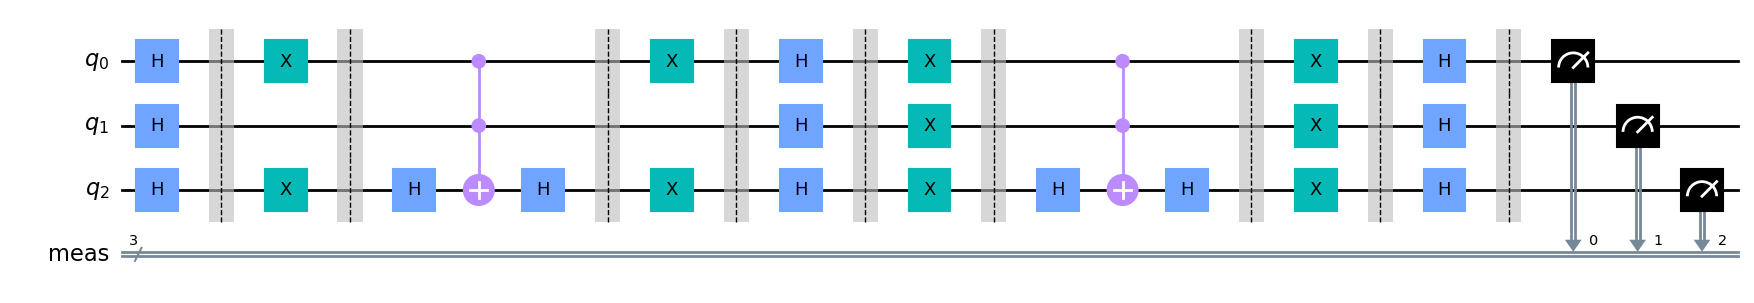

In [151]:
grover_circuit.measure_all()
grover_circuit.draw('mpl')



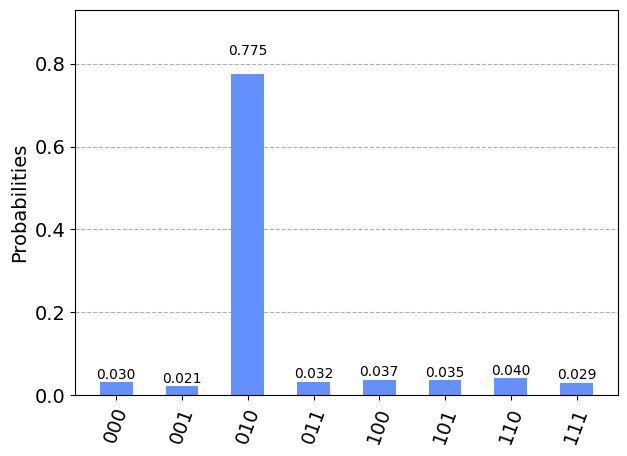

In [152]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Pour 101 : 
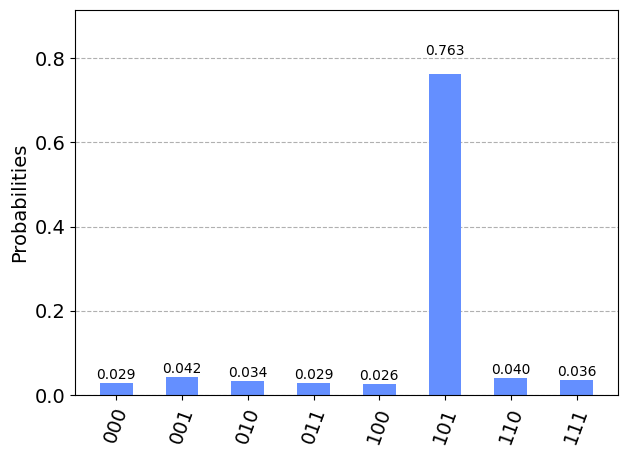

Pour 001 : 
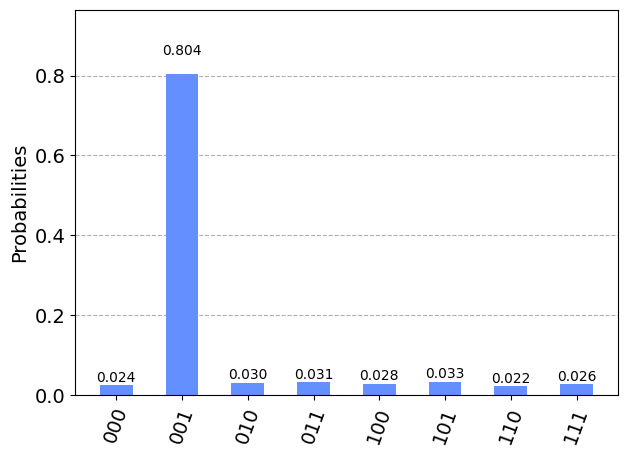

<h2> Généralisation à n qubits </h2>

On génère ici l'algorithme à n qubits pour rechercher un état de longueur n. On tente également de répèter l'oracle ainsi que le diffuseur pour affiner les résultats (exemple 2 fois avec len(n) = 5).

In [118]:
def to_repeat(grover_circuit, n):
    #Etape 3 : création du modèle oracle Grover
    grover_circuit.h(len(n)-1)
    grover_circuit.mct(list(range(len(n)-1)), len(n)-1)
    grover_circuit.h(len(n)-1)

    grover_circuit.barrier()

    for i in range(len(n)):
        if n[i] == '0':
            grover_circuit.x(len(n)-i-1)

    grover_circuit.barrier()

    #Etape 4 : La première étape de l'opérateur de diffusion de Grover. Appliquer des portes H à tous les qubits.
    multi_h(grover_circuit, list(range(len(n))))

    grover_circuit.barrier()

    #Etape 5 : la deuxième étape de l'opérateur de diffusion pour inverser la moyenne.
    multi_x(grover_circuit, list(range(len(n))))

    grover_circuit.barrier()

    grover_circuit.h(len(n)-1)
    grover_circuit.mct(list(range(len(n)-1)), len(n)-1)
    grover_circuit.h(len(n)-1)

    grover_circuit.barrier()

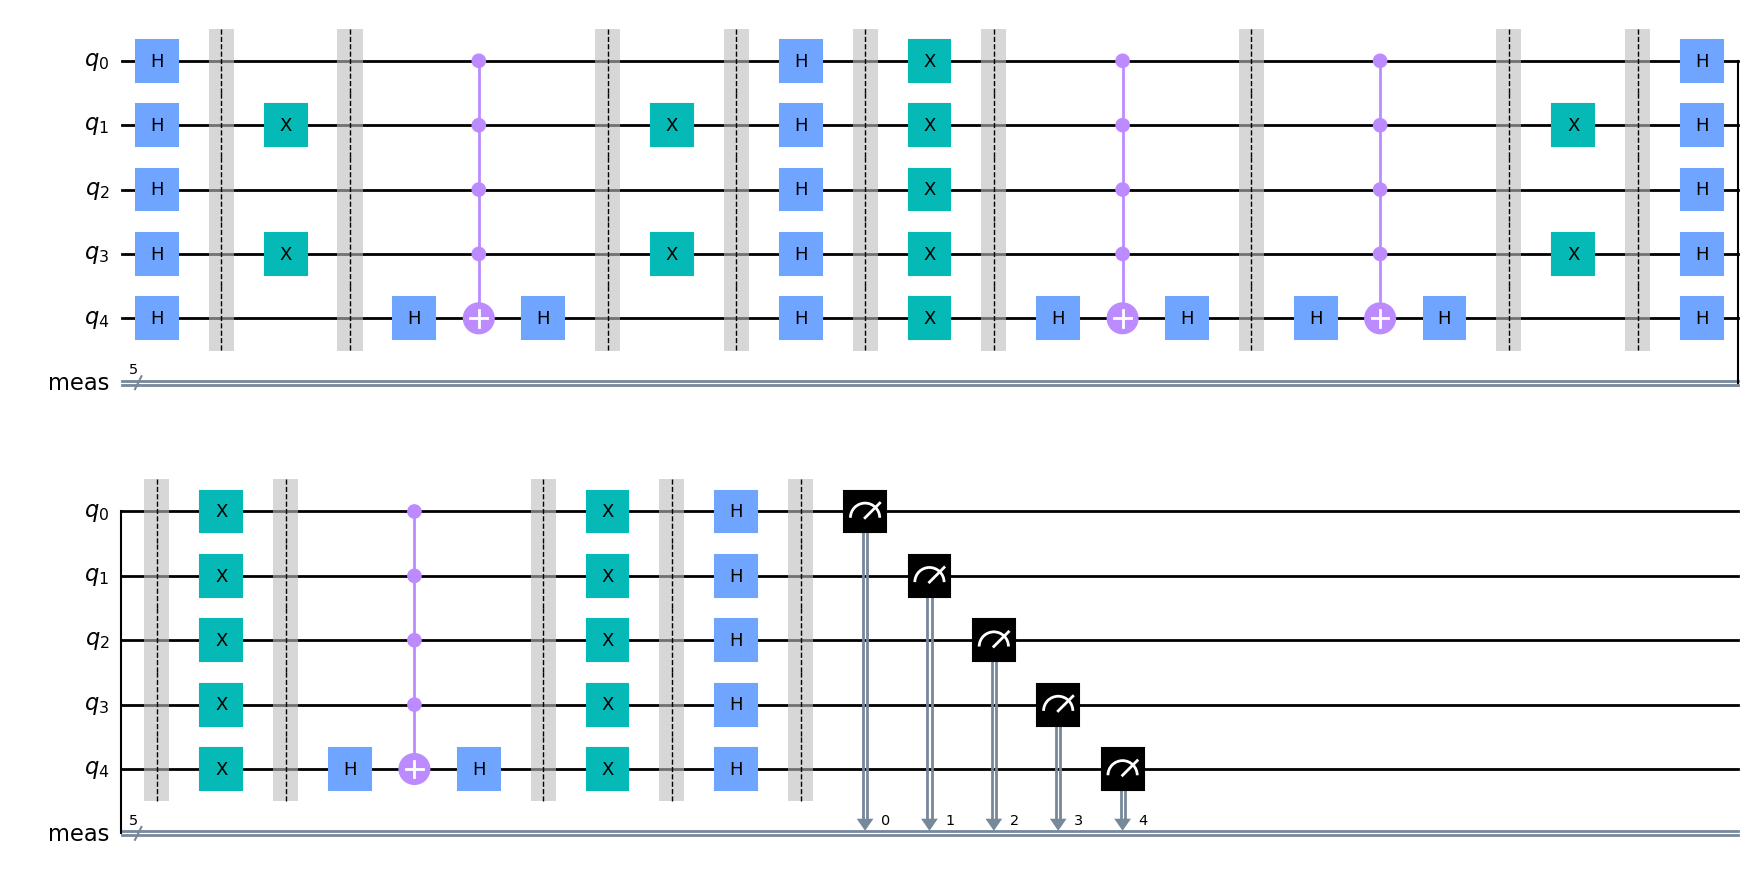

In [119]:
n = '10101' #on définit ici l'état à rechercher
ttr = 2 #nombre de fois où on veut répéter oracle + diffuseur (pour affiner les résultats)
grover_circuit = QuantumCircuit(len(n))
def multi_h(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc
def multi_x(qc, qubits):
    """Apply a x-gate to 'qubits' in qc"""
    for q in qubits:
        qc.x(q)
    return qc

#Etape 1 : initialisation du circuit en calculant le nb de qubits à créer et on applique H sur chaque qubit
grover_circuit = multi_h(grover_circuit, list(range(len(n))))
grover_circuit.draw()

grover_circuit.barrier()

#Etape 2 : on marque l'état recherché. On marque les qubits '0' dans l'état avec une porte X
for i in range(len(n)):
    if n[i] == '0':
        grover_circuit.x(len(n)-i-1)
        
grover_circuit.barrier()

for i in range(ttr):
    to_repeat(grover_circuit, n)

#Etape 6
multi_x(grover_circuit, list(range(len(n))))

grover_circuit.barrier()

multi_h(grover_circuit, list(range(len(n))))

grover_circuit.measure_all()
grover_circuit.draw('mpl')


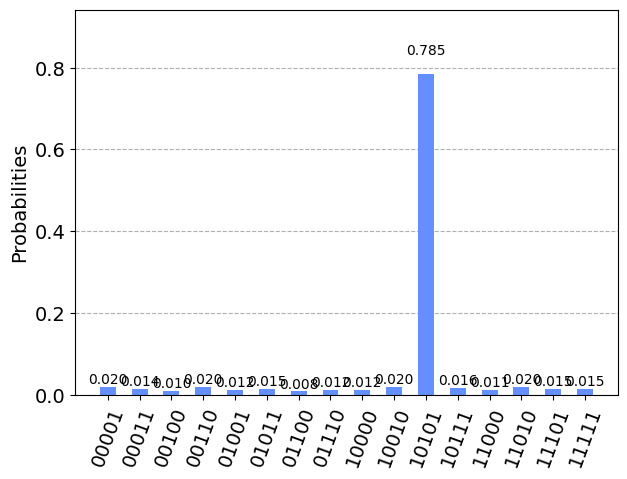

In [120]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)